# NLP feature engineering
## 1-One-hot encoding
In the previous exercise, we encountered a dataframe df1 which contained categorical features and therefore, was unsuitable for applying ML algorithms to.

In this exercise, your task is to convert df1 into a format that is suitable for machine learning.

In [2]:
import pandas as pd 
# import data 
df= pd.read_csv('C:/Users/rzouga/Downloads/Github/NLP/fake_or_real_news.csv')
# Print the head of df


df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Print the features of df1

print(df.columns)

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')




For machine learning, you almost definitely want to use sklearn.OneHotEncoder. For other tasks like simple analyses, you might be able to use pd.get_dummies, which is a bit more convenient.

Note that sklearn.OneHotEncoder has been updated in the latest version so that it does accept strings for categorical variables, as well as integers.

The crux of it is that the sklearn encoder creates a function which persists and can then be applied to new data sets which use the same categorical variables, with consistent results.

from sklearn.preprocessing import OneHotEncoder

##### Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")

encoder.fit(X_train)    # Assume for simplicity all features are categorical.

##### Apply the encoder.
X_train = encoder.transform(X_train)

X_test = encoder.transform(X_test)

Note how we apply the same encoder we created via X_train to the new data set X_test.

Consider what happens if X_test contains different levels than X_train for one of its variables. For example, let's say X_train["color"] contains only "red" and "green", but in addition to those, X_test["color"] sometimes contains "blue".

If we use pd.get_dummies, X_test will end up with an additional "color_blue" column which X_train doesn't have, and the inconsistency will probably break our code later on, especially if we are feeding X_test to an sklearn model which we trained on X_train.

And if we want to process the data like this in production, where we're receiving a single example at a time, pd.get_dummies won't be of use.

With sklearn.OneHotEncoder on the other hand, once we've created the encoder, we can reuse it to produce the same output every time, with columns only for "red" and "green". And we can explicitly control what happens when it encounters the new level "blue": if we think that's impossible, then we can tell it to throw an error with handle_unknown="error"; otherwise we can tell it to continue and simply set the red and green columns to 0, with handle_unknown="ignore".*


https://towardsdatascience.com/encoding-categorical-features-21a2651a065c


In [4]:
# Perform one-hot encoding
df1 = pd.get_dummies(df, columns=['label'])
# Print the new features of df1
print(df1.columns)

# Print first five rows of df1
print(df1.head())

Index(['Unnamed: 0', 'title', 'text', 'label_FAKE', 'label_REAL'], dtype='object')
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text  label_FAKE  label_REAL  
0  Daniel Greenfield, a Shillman Journalism Fello...           1           0  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...           1           0  
2  U.S. Secretary of State John F. Kerry said Mon...           0           1  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...           1           0  
4  It's primary day in New York and front-runners...           0           1  


## 2- Basic feature extraction
###  2-1- Character count 


In [5]:
# Create a feature char_count
df1['char_count'] = df1['text'].apply(len)

# Print the average character count
print(df1['char_count'].mean())

4707.250355169692


### 2-2 Word_count

In [6]:
# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
df1['word_count'] = df1['text'].apply(count_words)

# Print the average word count of the talks
print(df1['word_count'].mean())

776.3007103393844


### 2-3 Hashtags and mentions

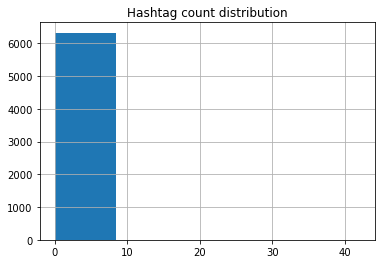

In [7]:
import matplotlib.pyplot as plt 
# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
df1['hashtag_count'] = df1['text'].apply(count_hashtags)
df1['hashtag_count'].hist(bins=5)
plt.title('Hashtag count distribution')
plt.show()

# Tokenization


In [8]:
# Import spacy
import spacy
documents = 'The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can'
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(str(documents))

# Generate the tokens
tokens = [token.text for token in doc]
print(tokens)

['The', 'taxi', '-', 'hailing', 'company', 'Uber', 'brings', 'into', 'very', 'sharp', 'focus', 'the', 'question', 'of', 'whether', 'corporations', 'can']


# Lemmatizing

In [9]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(documents)

# Generate lemmas
lemmas = [token.lemma_ for token in doc ]
# Convert lemmas into a string
print(' '.join(lemmas))

the taxi - hail company Uber bring into very sharp focus the question of whether corporation can


# Text cleaning

Clean this text into a more machine friendly format. This will involve converting to lowercase, lemmatization and removing stopwords, punctuations and non-alphabetic characters.

In [10]:
post='Twenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria.'
# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
doc = nlp(post)
stopwords = nlp.Defaults.stop_words
# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords ]

# Print string after text cleaning
print(' '.join(a_lemmas))

century politic witness alarm rise populism Europe warning sign come UK Brexit Referendum vote swinge way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include Alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


# Cleaning News in a dataframe

In [11]:
# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to df1['text']
df1['text'] = df1['text'].apply(preprocess)
print(df1['text'][0:3])

0    Daniel Greenfield Shillman Journalism Fellow F...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    Secretary State John Kerry Monday stop Paris l...
Name: text, dtype: object


# POS tagging 
In this exercise, you will perform part-of-speech tagging on a famous passage from one of the most well-known novels of all time, Lord of the Flies, authored by William Golding.

In [12]:
novel='He found himself understanding the wearisomeness of this life, where every path was an improvisation and a considerable part of one’s waking life was spent watching one’s feet.'
# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(novel)

# Generate tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

[('He', 'PRON'), ('found', 'VERB'), ('himself', 'PRON'), ('understanding', 'VERB'), ('the', 'DET'), ('wearisomeness', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('life', 'NOUN'), (',', 'PUNCT'), ('where', 'ADV'), ('every', 'DET'), ('path', 'NOUN'), ('was', 'AUX'), ('an', 'DET'), ('improvisation', 'NOUN'), ('and', 'CCONJ'), ('a', 'DET'), ('considerable', 'ADJ'), ('part', 'NOUN'), ('of', 'ADP'), ('one', 'NOUN'), ('’s', 'PART'), ('waking', 'VERB'), ('life', 'NOUN'), ('was', 'AUX'), ('spent', 'VERB'), ('watching', 'VERB'), ('one', 'PRON'), ('’s', 'PART'), ('feet', 'NOUN'), ('.', 'PUNCT')]


# Counting nouns in a piece of text
In this exercise, we will write two functions, nouns() and proper_nouns() that will count the number of other nouns and proper nouns in a piece of text respectively.

These functions will take in a piece of text and generate a list containing the POS tags for each word. It will then return the number of proper nouns/other nouns that the text contains. We will use these functions in the next exercise to generate interesting insights about fake news.

In [13]:
nlp = spacy.load('en_core_web_sm')

# Returns number of proper nouns
def proper_nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))
# Returns number of other nouns
def nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')

print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

3
2


# Noun usage in fake news
In this exercise, you have been given a dataframe headlines that contains news headlines that are either fake or real. Your task is to generate two new features num_propn and num_noun that represent the number of proper nouns and other nouns contained in the title feature of headlines.

Next, we will compute the mean number of proper nouns and other nouns used in fake and real news headlines and compare the values. If there is a remarkable difference, then there is a good chance that using the num_propn and num_noun features in fake news detectors will improve its performance.

In [ ]:
df1['num_propn'] = df1['text'].apply(proper_nouns)
# Compute mean of proper nouns
real_propn = df1[df1['label'] == 'REAL']['num_propn'].mean()
fake_propn = df1[df1['label'] == 'FAKE']['num_propn'].mean()
# Print results
print("Mean no. of proper nouns in real and fake headlines are %.2f and %.2f respectively"%(real_propn, fake_propn))

# Named entity recognition
 we will identify and classify the labels of various named entities in a body of text using one of spaCy's statistical models. We will also verify the veracity of these labels.


In [16]:
# Load the required model
nlp = spacy.load('en_core_web_sm')

# Create a Doc instance 
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp(text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

Sundar Pichai PERSON
Google ORG
Mountain View GPE


# Identifying people mentioned in a news article

In [17]:
text='It’s been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at the table shaping it.'
def find_persons(text):
    # Create Doc object
    doc = nlp(text)
  
    # Identify the persons
    persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  
    # Return persons
    return persons

print(find_persons(text))

['Sheryl Sandberg', 'Mark Zuckerberg']


# Building a bag of words model


In [18]:
# Import CountVectorizer
from sklearn.feature_extraction.text import  CountVectorizer

# Create CountVectorizer object
vectorizer= CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(df1['text'])

# Print the shape of bow_matrix
print(bow_matrix.shape)

(6335, 52824)


# Mapping feature indices with feature names
In the lesson video, we had seen that CountVectorizer doesn't necessarily index the vocabulary in alphabetical order. In this exercise, we will learn to map each feature index to its corresponding feature name from the vocabulary.

In [19]:
text1=['The lion is the king of the jungle', 'Lions have lifespans of a decade', 'The lion is an endangered species']
# Create CountVectorizer object
vectorizer = CountVectorizer ()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(text1)

# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names()

# Print bow_df
print(bow_df)

   an  decade  endangered  have  is  jungle  king  lifespans  lion  lions  of  \
0   0       0           0     0   1       1     1          0     1      0   1   
1   0       1           0     1   0       0     0          1     0      1   1   
2   1       0           1     0   1       0     0          0     1      0   0   

   species  the  
0        0    3  
1        0    0  
2        1    1  


# Building a BoW Naive Bayes classifier



In this exercise, you have been given two pandas Series, X_train and X_test, which consist of movie reviews

They represent the training and the test review data respectively.

Your task is to preprocess the reviews and generate BoW vectors for these two sets using CountVectorizer.
# Normalization 
Normalization after splitting into train and test/validation. The reason is to avoid any data leakage.

# Data Leakage:

Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.

Always split before you do any data pre-processing. Performing pre-processing before splitting will mean that information from your test set will be present during training, causing a data leak.

Think of it like this, the test set is supposed to be a way of estimating performance on totally unseen data. If it affects the training, then it will be partially seen data.

I don't think the order of scaling/imputing is as strict. I would impute first if the method might throw of the scaling/centering.

Your steps should be:

    Splitting
    Imputing
    Scaling


In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split 
# Import CountVectorizer
from sklearn.feature_extraction.text import  CountVectorizer
y = df.iloc[:,-1] #target column i.e 
# Create training and test sets
X_train,X_test, y_train, y_test= train_test_split(df["text"],y, test_size=0.2, random_state=53) 
# Create a CountVectorizer object
vectorizer =CountVectorizer(lowercase=True, stop_words='english')
# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)
# Transform X_test
X_test_bow = vectorizer.transform(X_test)
# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

(5068, 61360)
(1267, 61360)


# Label Encoder

In [49]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)
print(y_train.shape)
print(y_test.shape)
print(encoder.classes_)


(5068,)
(1267,)
[0 1]
[0 1]


# Predicting

In [50]:
# Create a MultinomialNB object
clf = MultinomialNB()
# Fit the classifier
clf.fit(X_train_bow,y_train)
# Measure the accuracy
accuracy = clf.score(X_test_bow ,y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)
# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The news predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.897
The news predicted by the classifier is 0


# Building n-gram models


In [52]:
# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(text1)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2),lowercase=True, stop_words='english')
ng2 = vectorizer_ng2.fit_transform(text1)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1, 3))
ng3 = vectorizer_ng3.fit_transform(text1)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))

ng1, ng2 and ng3 have 13, 27 and 39 features respectively


# Higher order n-grams for sentiment analysis
Similar to a previous exercise, we are going to build a classifier that can detect if the review of a particular movie is positive or negative. However, this time, we will use n-grams up to n=2 for the task.

The n-gram training reviews are available as X_train_ng. The corresponding test reviews are available as X_test_ng. Finally, use y_train and y_test to access the training and test sentiment classes respectively.

In [56]:
# Create a CountVectorizer object
# Fit and transform X_train
# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2),lowercase=True, stop_words='english')
X_train_ng = vectorizer_ng2.fit_transform(X_train)
# Transform X_test
X_test_ng = vectorizer_ng2.transform(X_test)
# Define an instance of MultinomialNB 
clf_ng =MultinomialNB()

# Fit the classifier 
clf_ng.fit(X_train_ng ,y_train )

# Measure the accuracy 
accuracy = clf_ng.score(X_test_ng,y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = clf_ng.predict(vectorizer_ng2.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.904
The sentiment predicted by the classifier is 0


In [62]:
import time
start_time = time.time()
# Generating ngrams
vectorizer = CountVectorizer(ngram_range=(1, 3))
X_train_ng3 = vectorizer.fit_transform(X_train)
X_test_ng3 = vectorizer.transform(X_test)

# Fit classifier
clf = MultinomialNB()
clf.fit(X_train_ng3, y_train)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(X_test_ng3, y_test), X_train_ng3.shape[1]))

The program took 114.094 seconds to complete. The accuracy on the test set is 0.90. The ngram representation had 3779472 features.


# Building tf-idf document vectors


In [73]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Create TfidfVectorizer object
vectorizer= TfidfVectorizer()
# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(text1)
# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(3, 13)


# Cosine similarity
pairwise distance provide distance between two array.so more pairwise distance means less similarity.while cosine similarity is 1-pairwise_distance so more cosine similarity means more similarity between two arrays.

# Best Document search :
https://medium.com/@adriensieg/text-similarities-da019229c894
https://towardsdatascience.com/the-best-document-similarity-algorithm-in-2020-a-beginners-guide-a01b9ef8cf05


In [76]:
# Record start time
start = time.time()
corpus=['The sun is the largest celestial body in the solar system', 'The solar system consists of the sun and eight revolving planets', 'Ra was the Egyptian Sun God', 'The Pyramids were the pinnacle of Egyptian architecture', 'The quick brown fox jumps over the lazy dog']
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim =cosine_similarity (tfidf_matrix,tfidf_matrix)
print(cosine_sim)
# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]
Time taken: 0.0260012149810791 seconds


In [77]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]
Time taken: 0.0 seconds


# Building a plot line based recommender


In [80]:
# Generate mapping between titles and index
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df["text"])

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('You Can Smell Hillary’s Fear', cosine_sim, indices))

1031    FBI REDUX: What’s Behind New Probe into Hillar...
4016    Memo to Comey: Keep Your Damn Hands Off Our El...
5514    FBI “Insurrection” to Scuttle Director, Rig El...
3897    Clinton Camp Tries to Deflect Suspicion as FBI...
1563    NBC's Baghdad Bob: There Is No FBI Investigati...
750          Why Comey Reopened the Hillary Investigation
4548    FBI Reopen Hillary Clinton Email Investigation...
2462    Why Comey Reopened the Hillary Investigation (...
5090    New emails under review in Clinton case emerge...
6326    DOJ COMPLAINT: Comey Under Fire Over Partisan ...
Name: title, dtype: object


# Beyond n-grams: word embeddings


In [82]:
 sent = 'I like apples and oranges'
# Create the doc object
doc = nlp(sent)

# Compute pairwise similarity scores
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

I I 1.0


C:\Users\rzouga\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  


I like 0.060950655
I apples -0.014093488
I and -0.09230058
I oranges -0.20608483
like I 0.060950655
like like 1.0
like apples -0.018225208
like and 0.09190109
like oranges -0.12486788
apples I -0.014093488
apples like -0.018225208
apples apples 1.0
apples and 0.060377873
apples oranges 0.6448554
and I -0.09230058
and like 0.09190109
and apples 0.060377873
and and 1.0
and oranges 0.020107673
oranges I -0.20608483
oranges like -0.12486788
oranges apples 0.6448554
oranges and 0.020107673
oranges oranges 1.0


# Readability tests


In [ ]:
# Import Textatistic
from textatistic import Textatistic

# Compute the readability scores 
readability_scores = Textatistic(df1['text'][0]).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))



# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []
for excerpt in excerpts:
    readability_scores = Textatistic(excerpt).scores
    gunning_fog = readability_scores['gunningfog_score']
    gunning_fog_scores.append(gunning_fog)

# Print the gunning fog indices
print(gunning_fog_scores)